In [2]:
import tensorflow as tf
import os

In [27]:
import matplotlib.pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
len(gpus)

1

In [6]:
#Avoid OOM errors by setting GPU memory consumption growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [11]:
import cv2

In [12]:
import imghdr

In [20]:
data_dir = 'D:\Deep Learning Practise\Datasets\human_emotions_data'
img_ext = ['jpeg','jpg','bmp','png']

In [21]:
os.listdir(data_dir)

['Angry', 'Happy', 'Sad']

In [22]:
os.listdir(os.path.join(data_dir,'Angry'))

['0346f330983a068db0633f96d4a13de873-06-angry.rsquare.w700.jpg',
 '118-1183761_angry-person-transparent-images-png-angry-man-png.png',
 '118-1183847_angry-person-png-picture.png',
 '139-1393790_angry-person-png-pic-angry-man-clipart-png.png',
 '1564075.jpg',
 '19_1016_DISCIPLESHIP_How-to-Deal-With-Angry-People_1021x640-696x436.jpg',
 '32209658.jpg',
 '3710928.jpg',
 '40-bigstock-Mad-fight-of-business-people-61801940.jpg',
 '439-4398363_angry-man-png-pictures-angry-person-png-transparent.png',
 '5cd88fd321000035007f6cd2.jpeg',
 '60552212-angry-people-illustration-design-collection.jpg',
 '68-688804_angry-person-png-images-angry-man-transparent-png.png',
 '7-ways-anger-is-ruining-your-health-722x406.jpg',
 '800px-Angry-2766265_960_720.jpg',
 'ad_220696309.jpg',
 'anger-18615_640.jpg',
 'anger-can-kill-you-main.jpg',
 'Anger_Controlls_Him.jpg',
 'anger_ruining_898.jpg',
 'angry-children.jpg',
 'angry-complaining-group-business-people-260nw-1921199924.jpg',
 'angry-customer-86255098-760.jp

### Remove Dodgy images

In [23]:
img = cv2.imread(os.path.join(data_dir,'Happy','1HEoLBLidT2u4mhJ0oiDgig.png'))

In [24]:
img.shape

(933, 1400, 3)

##### BY default image is read in bgr format so we have to convert it to correct format

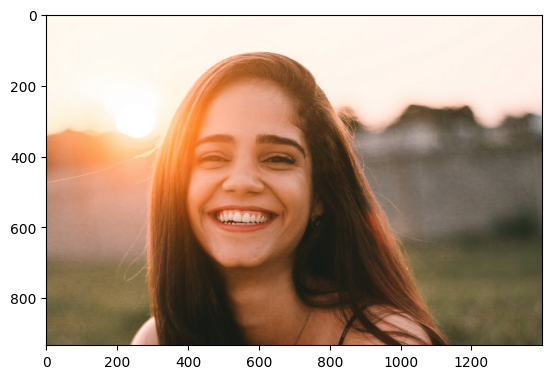

In [28]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

933 is the length of image.

1400 is breadth of image.

3 is no of channels.

so here we will need 3D tensors.


In [29]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print(f"{image} : is not in prefered format")
                os.remove(image_path)
        except Exception as e:
            print(f"issue with the image with the path {image_path}")


0346f330983a068db0633f96d4a13de873-06-angry.rsquare.w700.jpg : is not in prefered format
5cd88fd321000035007f6cd2.jpeg : is not in prefered format
60552212-angry-people-illustration-design-collection.jpg : is not in prefered format
7-ways-anger-is-ruining-your-health-722x406.jpg : is not in prefered format
800px-Angry-2766265_960_720.jpg : is not in prefered format
angry-complaining-group-business-people-260nw-1921199924.jpg : is not in prefered format
angry-man-shouting-out-loud-260nw-1417294826.jpg : is not in prefered format
angry-people-screaming-260nw-292800785.jpg : is not in prefered format
depositphotos_42931643-stock-photo-crazy-housewife-with-kitchen-tools.jpg : is not in prefered format
depositphotos_53144077-stock-photo-businesswoman-covering-her-face-with.jpg : is not in prefered format
family-three-mother-father-son-260nw-1598501143.jpg : is not in prefered format
group-young-hispanic-people-standing-260nw-2140287687.jpg : is not in prefered format
single-angry-person-mob

Checked whether the images are in correct format.

### Load Data